# Data dependence on g, minimum turbulence scale varied

In [1]:
import numpy as np
import random
import time

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import IPython

In [4]:
%matplotlib inline

In [5]:
print(np.__version__) #Should be 1.20.3

1.20.3


In [6]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))+"/analysis_scripts/ALP_sim")     #!!! Change path to location of differential_counts.py and ALP_sim.py
from ALP_quick_sim import ALP_sim

In [7]:
def full_params(
                params: list[float]
                ) -> list[float]:
        
        ''' 
        The default parameter expansion function. The expansion function allows to flexibly choose 
        which model parameters are considered as input to the model method (e.g. self.model,
        self.model_log, etc. Toy models are not affected). For example, when this present default 
        function is used, the only inputs to the model methods are the values of mass and coupling, 
        i.e. a 2D list. If you wanted to make, for example, the rms of the B-field the third input 
        parameter, first copy self.full_params_default to a new function new_func(params), change 
        the value corresponding to the B-field RMS value to "params[2]", and then set 
        self.full_param_vec (see init method) to new_func. See also method full_params_spectral for
        a different example. The model methods will then expect a 3D list instead. When running the 
        model method, self.full_param_vec(params) is called, effectively expanding the model 
        parameters to the full list of 18.  
        
        
        Input:
            -  params:              Input parameters to model methods. 

        Output:
            -  full_par             Full list of all 18 model parameter values. 


        '''
        
        full_par = [
                    params[0],          # mass m in neV
                    params[1],          # coupling constant g in 10^(-11) /GeV
                    
                    5.75 * 1e-9,        # Amplitude of power law, in "TeV-1 cm-2 s-1" # 10e-6 
                    2.36859,            # Spectral index of the PWL
                    153.86,             # Reference energy (?) E0, In GeV
                    819.72,             #Cut-off energy Ecut, in GeV
                    
                    
                    25.,                # rms of B field, default = 10.
                    39.,                # normalization of electron density, default = 39.
                    4.05,               # second normalization of electron density, see Churazov et al. 2003, Eq. 4, default = 4.05
                    500.,               # extension of the cluster, default = 500.
                    80.,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 80.
                    280.,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 200.
                    1.2,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 1.2
                    0.58,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 0.58
                    0.5,                # scaling of B-field with electron denstiy, default = 0.5
                    0.18,               # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 0.18
                    params[2],                 # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 9.
                    -2.80               # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = -2.80
                    ]
    
        return full_par

In [8]:
A = ALP_sim(set_obs=False, set_null=False)

In [9]:
A.full_param_vec = full_params

In [10]:
A.configure_model(ALP_seed=0, residuals=True, logcounts=True, null_params = [0,0], log_params = [0,0,1])

/home/gertwk/ALPs_with_SWYFT/analysis_scripts/ALP_sim/ALP_quick_sim.py:467: UserWarning: The number of model parameters, log-indicators, null-hypothesis parameters, parameter names and parameter units are not equal
  warnings.warn("The number of model parameters, log-indicators, null-hypothesis parameters, parameter names and parameter units are not equal")


In [11]:
A.configure_obs(nbins = 90, nbins_etrue = 180,livetime = 10,emin=1e1, emax=1.5e4,
                irf_file = os.path.dirname(os.path.dirname(os.getcwd()))+"/IRFs/CTA/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits" )

In [12]:
ms = [0.1, 10, 250, 400]
gs = [0.2, 0.5, 0.8, 1.1]

nuisance_guess = 0.98
np_bounds = [0.92, 1.05]
np_bounds_agnostic = [0, 3.8]

In [13]:
colors = ['r','#FF9900','g','b','m']
linestyles = ['-','-','-','-','-']

Generating new null-hypothesis... 

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


done.


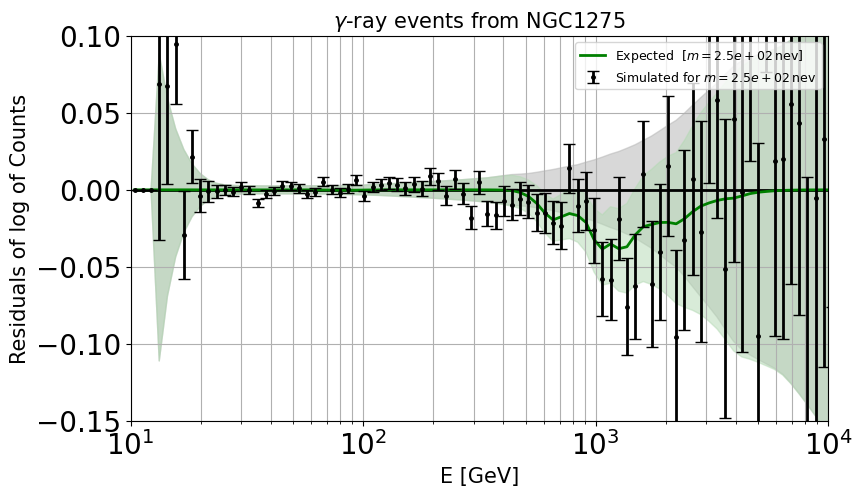

In [14]:
A.configure_plot(xmin = 1e1, xmax = 1e4, ymin=-0.15, ymax=0.1, legend=1)
A.configure_model(params=[ms[2],gs[2], nuisance_guess], null_params=[0,0,nuisance_guess])
A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0) 
A.compute_case(new_fig=0,plot_obs=1,color=colors[2],linestyle='-',label_exp=1, errorbands=1)
plt.show()

CPU times: user 1min, sys: 6.84 s, total: 1min 7s
Wall time: 1min 7s


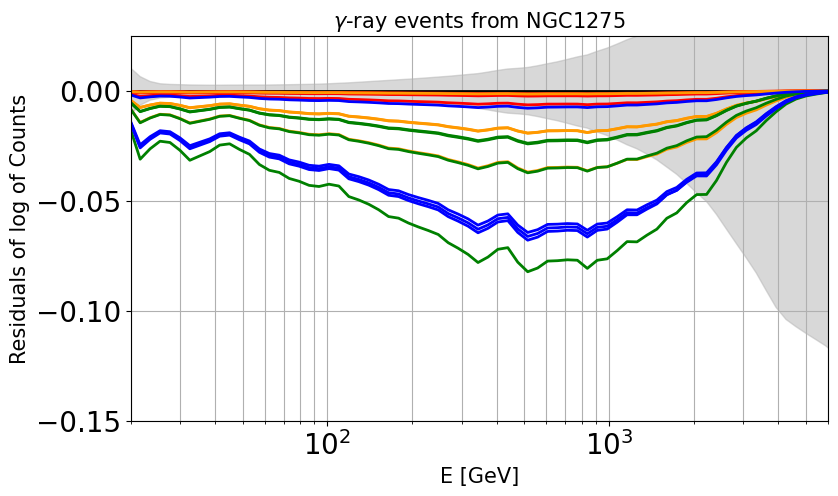

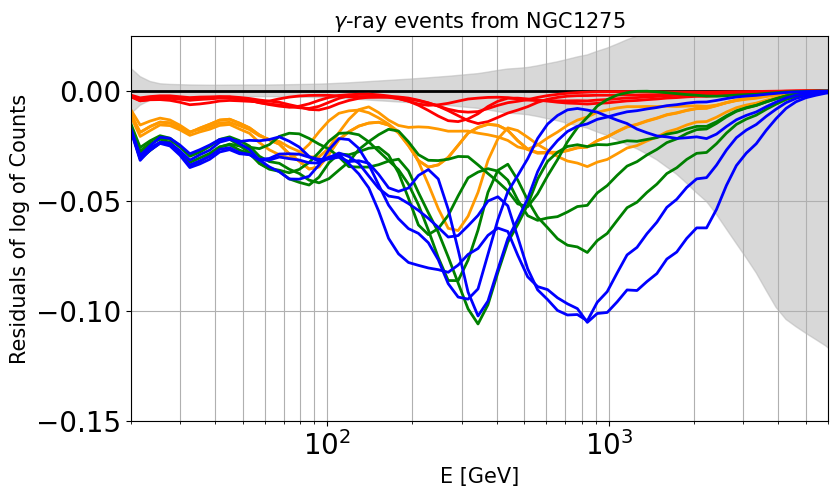

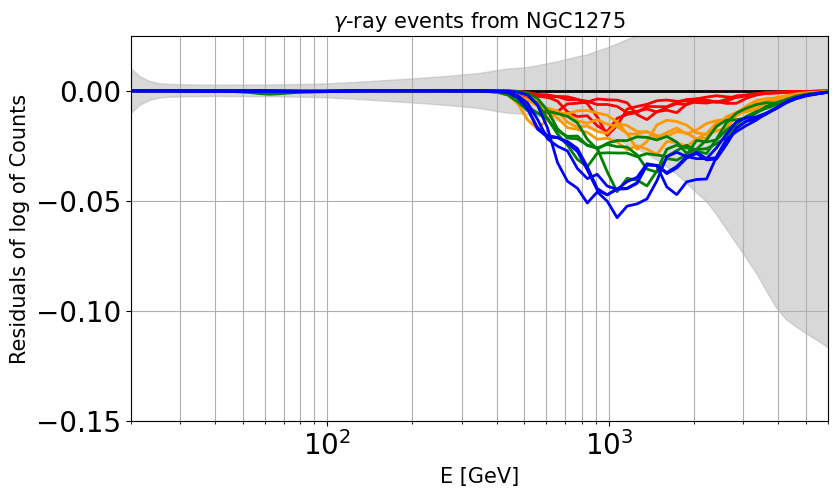

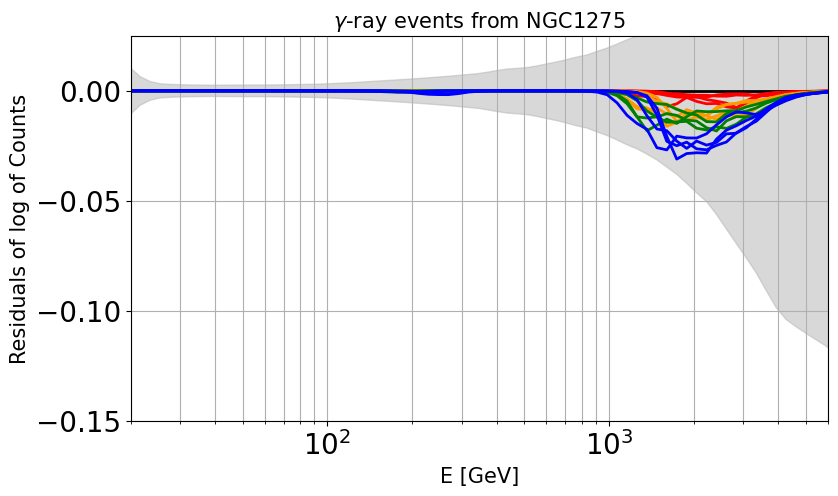

In [15]:
%%time
ngs = 4
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.15, ymax=0.025, legend = 0)
for m in ms:
    A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0)
    for i, g in enumerate(gs):
        for j in range(ngs):
            nuisance = np.random.uniform(np_bounds[0], np_bounds[1])
            A.configure_model(params=[m,g, nuisance])
            label_exp = 1 if j==0 else 0
            A.compute_case(new_fig=0,plot_obs=0,color=colors[i],linestyle=linestyles[i],label_exp=label_exp, errorbands=False)

CPU times: user 1h 4min 4s, sys: 13min 34s, total: 1h 17min 38s
Wall time: 1h 17min 57s


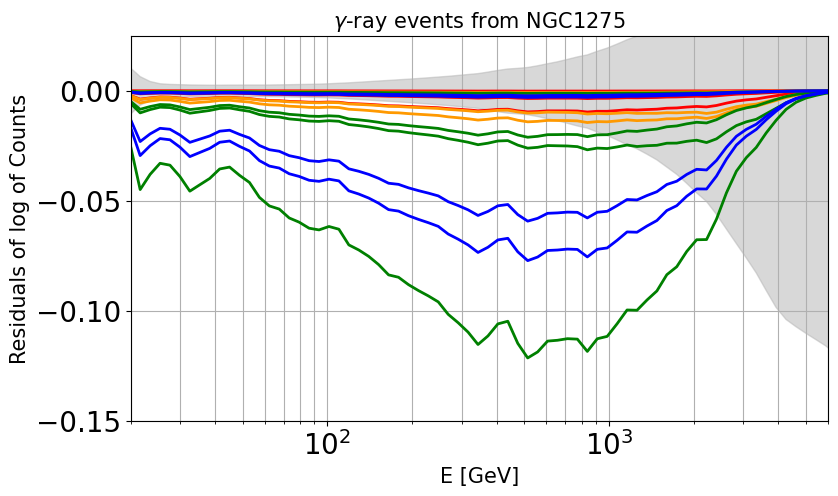

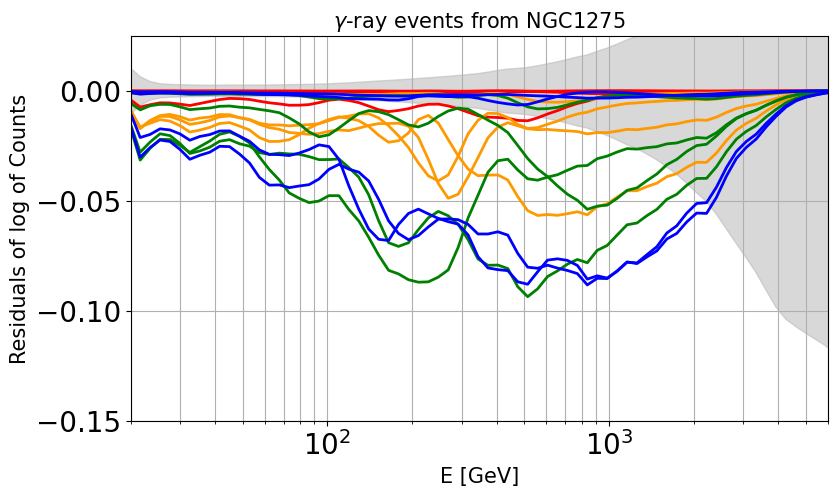

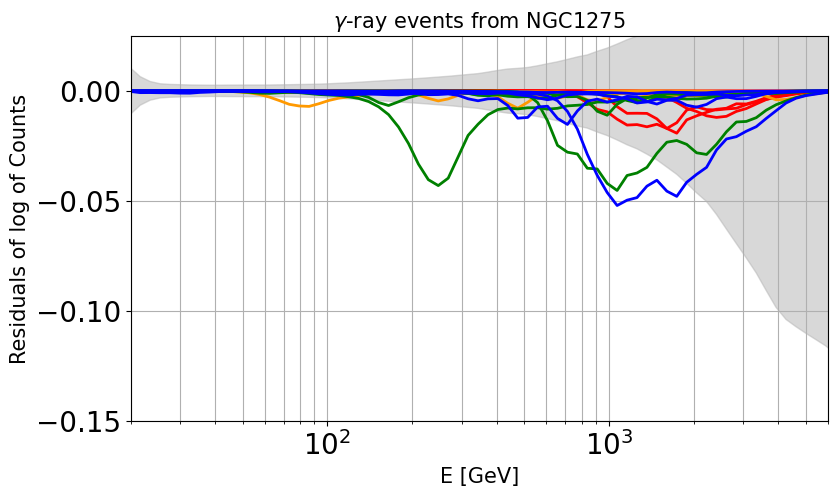

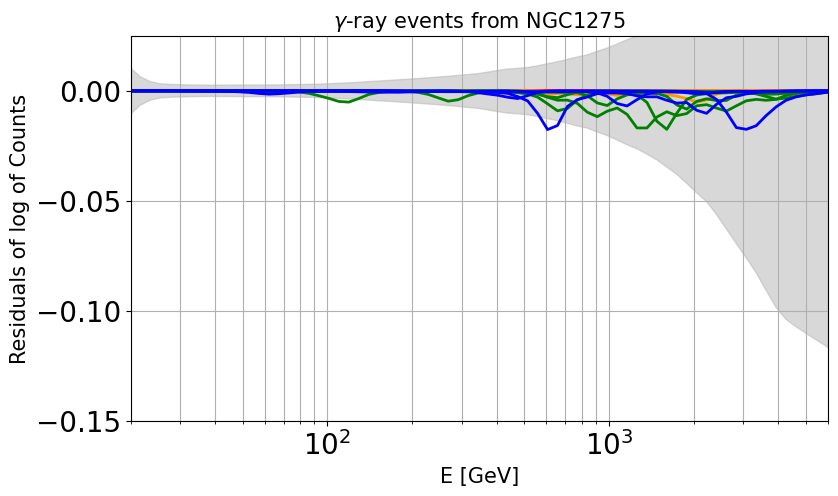

In [16]:
%%time
ngs = 4
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.15, ymax=0.025, legend = 0)
for m in ms:
    A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0)   
    for i, g in enumerate(gs):
        for j in range(ngs):
            nuisance = np.random.uniform(np_bounds_agnostic[0], np_bounds_agnostic[1])
            A.configure_model(params=[m,g, nuisance])
            label_exp = 1 if j==0 else 0
            A.compute_case(new_fig=0,plot_obs=0,color=colors[i],linestyle=linestyles[i],label_exp=label_exp, errorbands=False)

CPU times: user 2min 24s, sys: 15.3 s, total: 2min 39s
Wall time: 2min 40s


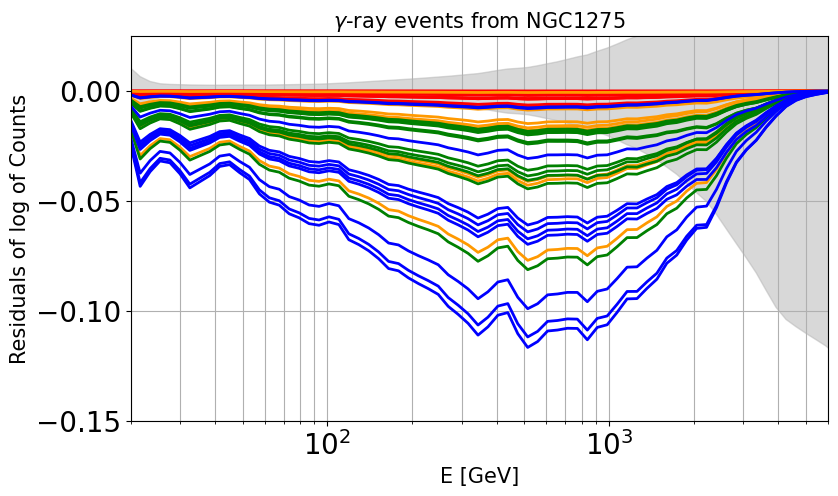

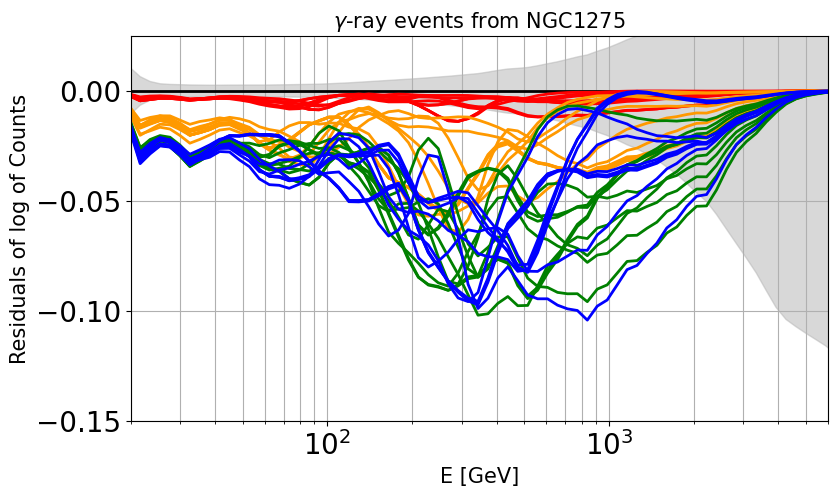

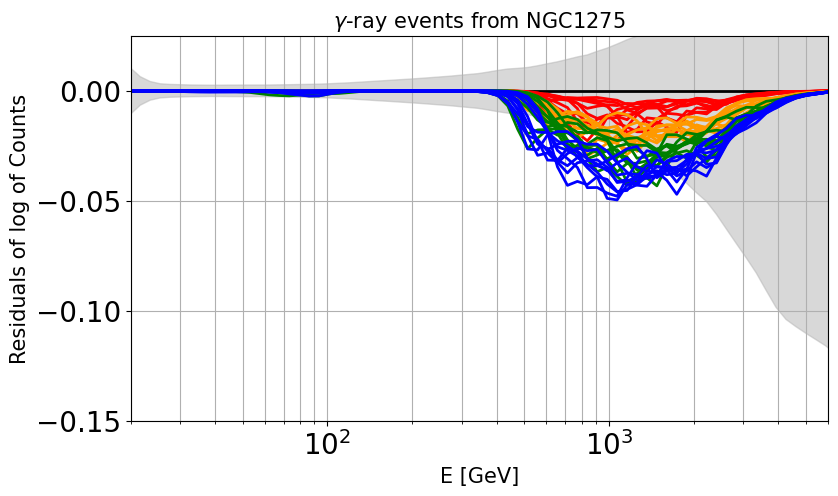

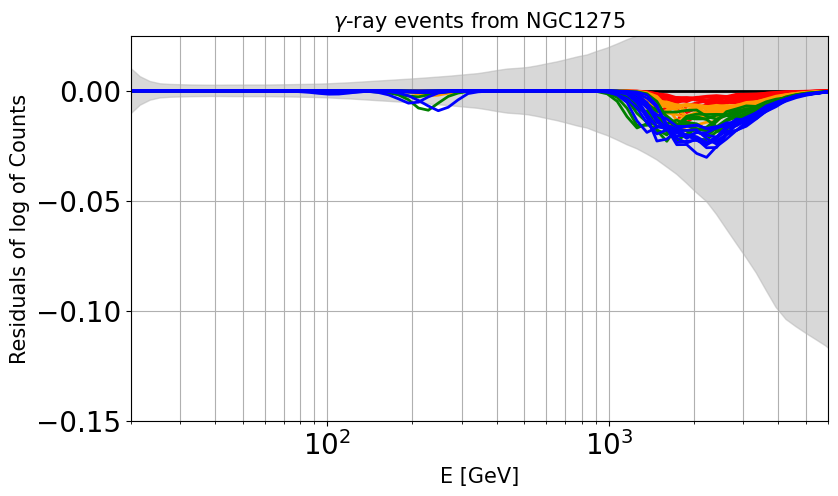

In [17]:
%%time
ngs = 10
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.15, ymax=0.025, legend = 0)
for m in ms:
    A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0)   
    for i, g in enumerate(gs):
        for j in range(ngs):
            nuisance = np.random.uniform(np_bounds[0], np_bounds[1])
            A.configure_model(params=[m,g, nuisance])
            label_exp = 1 if j==0 else 0
            A.compute_case(new_fig=0,plot_obs=0,color=colors[i],linestyle=linestyles[i],label_exp=label_exp, errorbands=False)

CPU times: user 3h 2min 47s, sys: 38min 15s, total: 3h 41min 2s
Wall time: 3h 41min 56s


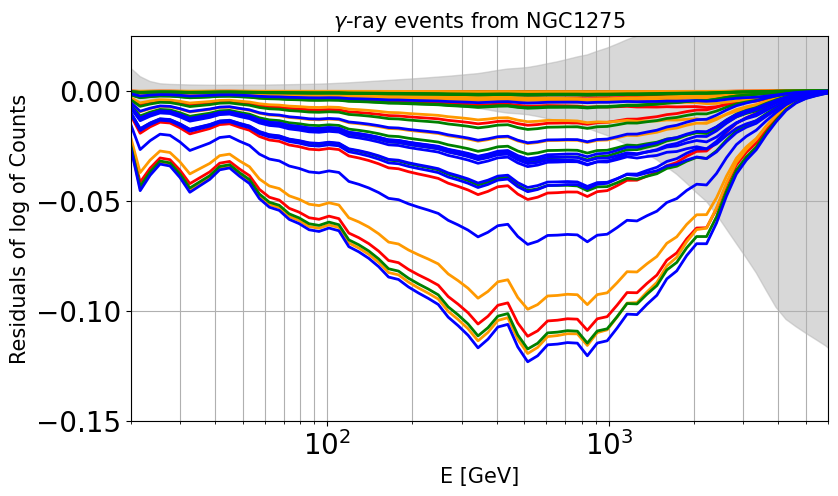

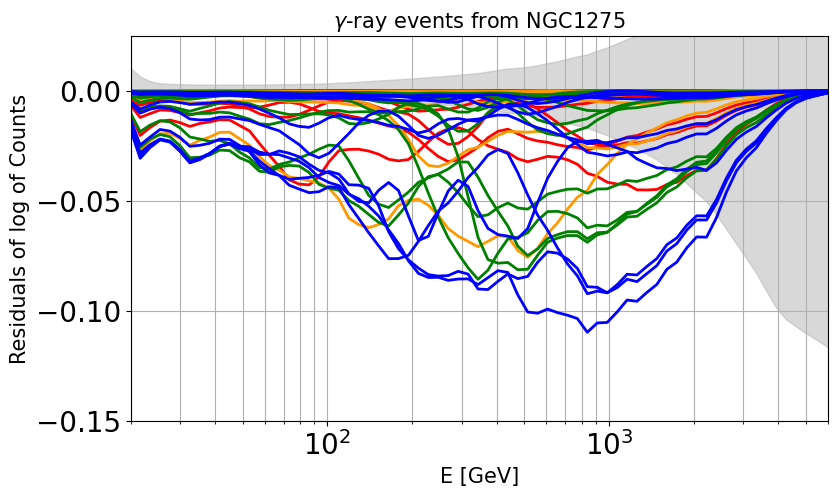

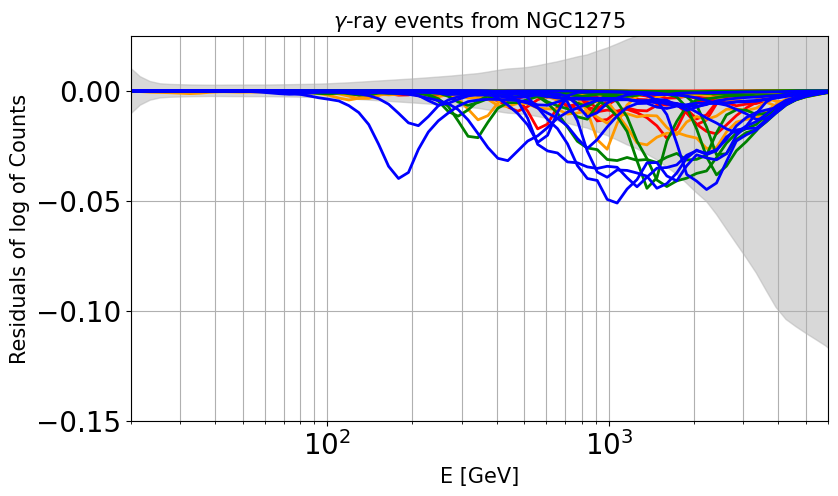

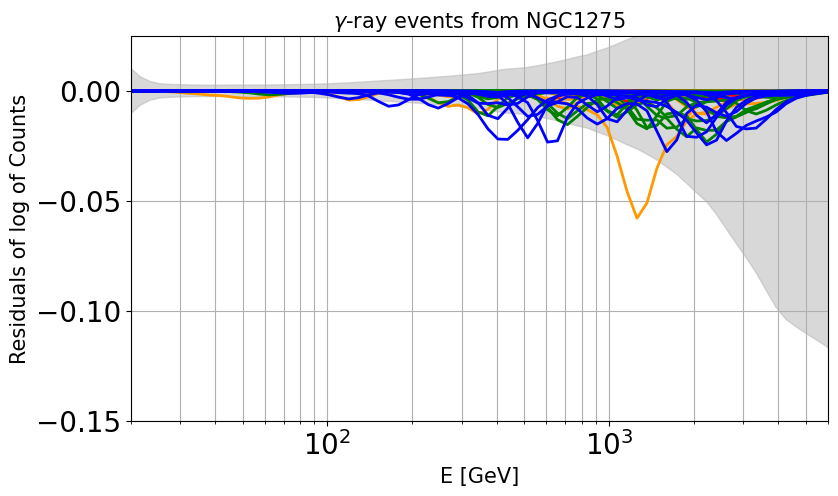

In [18]:
%%time
ngs = 10
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.15, ymax=0.025, legend = 0)
for m in ms:
    A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0)   
    for i, g in enumerate(gs):
        for j in range(ngs):
            nuisance = np.random.uniform(np_bounds_agnostic[0], np_bounds_agnostic[1])
            A.configure_model(params=[m,g, nuisance])
            label_exp = 1 if j==0 else 0
            A.compute_case(new_fig=0,plot_obs=0,color=colors[i],linestyle=linestyles[i],label_exp=label_exp, errorbands=False)